In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Hello Google Drive!

In [ ]:
cd /gdrive

/gdrive


In [ ]:
cd \My Drive

/gdrive/My Drive


In [ ]:
cd \Project 1

/gdrive/My Drive/Project 1


In [ ]:
ls

'Multiclass Multilabel prediction For stack overflow Questions'/


In [ ]:
cd \Multiclass Multilabel prediction For stack overflow Questions

/gdrive/My Drive/Project 1/Multiclass Multilabel prediction For stack overflow Questions


In [ ]:
# ls

In [ ]:

%tensorflow_version 2.x

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
questians = r'Questions.csv'
#answers = r'Answers.csv'
tags = r'Tags.csv'

In [ ]:
questions_data = pd.read_csv(questians, encoding='latin 1')
#answers_data = pd.read_csv(answers, encoding='latin 1')
tags_data = pd.read_csv(tags,encoding='latin 1')

""" Latin-1 encodes just the first 256 code points of the unicode character set, whereas UTF-8 can be used to"
    encode all code points. at physical encoding level only codepoints 0-127 get encoded identically code point
    128-255 differ by becomming 2-byte sequence with UTF-8 whereas they are single bytes with Latin-1"""


' Latin-1 encodes just the first 256 code points of the unicode character set, whereas UTF-8 can be used to"\n    encode all code points. at physical encoding level only codepoints 0-127 get encoded identically code point\n    128-255 differ by becomming 2-byte sequence with UTF-8 whereas they are single bytes with Latin-1'

In [ ]:
# questions_data.head()

In [ ]:
# tags_data.head()

In [ ]:
# answers_data.head()

In [ ]:
# grouping the tags
grouped_tags = tags_data.groupby("Tag", sort="count").size().reset_index(name = 'count_number')

In [ ]:
# grouped_tags

In [ ]:
# take most common tags in the dataset
num_classes = 10
grouped_tags_1 = tags_data.groupby("Tag").size().reset_index(name='count_number')
top_10 = grouped_tags_1.nlargest(num_classes, columns='count_number')

In [ ]:
top_10


,Tag,count_number
16121,javascript,124155
16020,java,115212
4301,c#,101186
24211,php,98808
979,android,90659
16611,jquery,78542
25712,python,64601
14180,html,58976
4311,c++,47591
15565,ios,47009


In [ ]:
# Filtering the top 10 tags data

tags_data.Tag = tags_data.Tag.apply(lambda tag : tag if tag in top_10.Tag.values else None)

In [ ]:
tags_data

,Id,Tag
0,80,None
1,80,None
2,80,None
3,90,None
4,90,None
...,...,...
3750989,40143360,javascript
3750990,40143360,None
3750991,40143380,None
3750992,40143380,None


In [ ]:
tags_data.dropna(inplace=True)

In [ ]:
# tags_data

In [ ]:
!pip install -q wordcloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
def clean_text(df):
    all_reviews = list()
    lines = df["Body"].values.tolist()
    for text in lines:
        text = text.lower()
        
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        
        emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text = emoji.sub(r'', text)
        
        text = re.sub(r"i'm", "i am", text)
        text = re.sub(r"he's", "he is", text)
        text = re.sub(r"she's", "she is", text)
        text = re.sub(r"that's", "that is", text)        
        text = re.sub(r"what's", "what is", text)
        text = re.sub(r"where's", "where is", text) 
        text = re.sub(r"\'ll", " will", text)  
        text = re.sub(r"\'ve", " have", text)  
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"don't", "do not", text)
        text = re.sub(r"did't", "did not", text)
        text = re.sub(r"can't", "can not", text)
        text = re.sub(r"it's", "it is", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"have't", "have not", text)
        
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        tokens = word_tokenize(text)
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
#         stop_words = set(stopwords.words("english"))
#         stop_words.discard("not")
#         words = [w for w in words if not w in stop_words]
        words = ' '.join(words)
        all_reviews.append(words)
    return all_reviews

all_reviews = clean_text(questions_data)
all_reviews[0:20]

['pi have written a database generation script in a hrefsqla and want to execute it in my a hrefadobe aira applicationp precodecreate table trole roleid integer primary key rolename create table tfile fileid integer primary key filename filedescription thumbnailid integer fileformatid integer categoryid integer isfavorite boolean dateadded date globalaccesscount integer lastaccesstime date downloadcomplete boolean isnew boolean isspotlight boolean duration create table tcategory categoryid integer primary key categoryname parentcategoryid integer codepre pi execute this in adobe air using the following methodsp precodepublic static function runsqlfromfilefilenamestringvoid var filefile fileapplicationdirectoryresolvepathfilename var streamfilestream new filestream streamopenfile filemoderead var strsqlstring streamreadutfbytesstreambytesavailable nonquerystrsql public static function nonquerystrsqlstringvoid var sqlconnectionsqlconnection new sqlconnection sqlconnectionopenfileapplicat

In [ ]:
def clean_text(df):
    all_reviews1 = list()
    lines = df["Title"].values.tolist()
    for text in lines:
        text = text.lower()
        
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        
        emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text = emoji.sub(r'', text)
        
        text = re.sub(r"i'm", "i am", text)
        text = re.sub(r"he's", "he is", text)
        text = re.sub(r"she's", "she is", text)
        text = re.sub(r"that's", "that is", text)        
        text = re.sub(r"what's", "what is", text)
        text = re.sub(r"where's", "where is", text) 
        text = re.sub(r"\'ll", " will", text)  
        text = re.sub(r"\'ve", " have", text)  
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"don't", "do not", text)
        text = re.sub(r"did't", "did not", text)
        text = re.sub(r"can't", "can not", text)
        text = re.sub(r"it's", "it is", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"have't", "have not", text)
        
        text = re.sub(r"[,.\"!@$%^&*(){}?/;`~:<>+=-]", "", text)
        tokens = word_tokenize(text)
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
#         stop_words = set(stopwords.words("english"))
#         stop_words.discard("not")
#         words = [w for w in words if not w in stop_words]
        words = ' '.join(words)
        all_reviews1.append(words)
    return all_reviews1

all_reviews1 = clean_text(questions_data)
all_reviews1[0:20]

['sqlstatementexecute multiple queries in one statement',
 'good branching and merging tutorials for tortoisesvn',
 'aspnet site maps',
 'function for creating color wheels',
 'adding scripting functionality to net applications',
 'should i use nested classes in this case',
 'homegrown consumption of web services',
 'deploying sql server databases from test to live',
 'automatically update version number',
 'visual studio setup project per user registry settings',
 'how do i connect to a database and loop over a recordset in c',
 'how to get the value of built encoded viewstate',
 'how do i delete a file which is locked by another process in c',
 'process size on unix',
 'use svn revision to label build in ccnet',
 'how to make subdomain user accounts in a webapp',
 'is nant still supported and suitable for net',
 'is windows server server core appropriate for a sql server instance',
 'what is the best way to copy a database',
 'can i logically reorder columns in a table']

In [ ]:
str1 = all_reviews1
str2 = all_reviews
Text = str1  + str2


In [ ]:
# Text

In [ ]:
questions_data['Text_title'] = str1

In [ ]:
questions_data['Text_body'] = str2

In [ ]:
# questions_data.drop(["Text"], axis = 1, inplace = True) 


In [ ]:
# questions_data.head()

In [ ]:
questions_data.shape

(1264216, 9)

In [ ]:
# tags_data.shape

In [ ]:
# tags_data.head()

In [ ]:
tags_data.sort_values('Id')
#Pandas sort_vlaues() function sorts a data frame in Ascending or Desccending order of passed column

,Id,Tag
14,260,c#
18,330,c++
28,650,c#
35,930,c#
39,1010,c#
...,...,...
3750974,40143150,javascript
3750981,40143190,python
3750984,40143210,php
3750987,40143340,android


In [ ]:
# tags_data.nunique()

In [ ]:
tag_ids = list(tags_data['Id'])

In [ ]:
# tag_ids

In [ ]:
  questiond_data_top_10 = questions_data[questions_data['Id'].isin(tag_ids)]
  # questiond_data_top_10

In [ ]:
#merging the data
questions_data_top_10 = questiond_data_top_10.merge(tags_data)
# questions_data_top_10

In [ ]:
#dropping unwanted columns
questions_data_top_10.drop(['OwnerUserId','CreationDate','ClosedDate','Score','Title','Body'],axis=1,inplace=True)

In [ ]:
questions_data_top_10

,Id,Text_title,Text_body,Tag
0,260,adding scripting functionality to net applicat...,pi have a little game written in c it uses a d...,c#
1,330,should i use nested classes in this case,pi am working on a collection of classes used ...,c++
2,650,automatically update version number,pi would like the version property of my appli...,c#
3,930,how do i connect to a database and loop over a...,pwhat is the simplest way to connect and query...,c#
4,1010,how to get the value of built encoded viewstate,pi need to grab the representation of the view...,c#
...,...,...,...,...
826734,40143150,youtube iframe api no ready call no error call,pi am trying to detect the flash out of date e...,javascript
826735,40143190,how to execute multiline python code from a ba...,pi need to extend a shell script bash as i am ...,python
826736,40143210,url routing in php mvc,pi am building a custom mvc project and i have...,php
826737,40143340,obfuscating code in android studio,punder minifyenabled i changed from false to t...,android


In [44]:
questions_data_top_10['Text'] = questions_data_top_10['Text_title'].str.cat(questions_data_top_10['Text_body'], sep =" ") 

In [45]:
#dropping unwanted columns
questions_data_top_10.drop(['Text_title','Text_body'],axis=1,inplace=True)

In [46]:
questions_data_top_10

,Id,Tag,Text
0,260,c#,adding scripting functionality to net applicat...
1,330,c++,should i use nested classes in this case pi am...
2,650,c#,automatically update version number pi would l...
3,930,c#,how do i connect to a database and loop over a...
4,1010,c#,how to get the value of built encoded viewstat...
...,...,...,...
826734,40143150,javascript,youtube iframe api no ready call no error call...
826735,40143190,python,how to execute multiline python code from a ba...
826736,40143210,php,url routing in php mvc pi am building a custom...
826737,40143340,android,obfuscating code in android studio punder mini...


In [47]:
a = questions_data_top_10['Text']
max_len = 0
for d in a:
    max_len = len(d) if len(d) > max_len else max_len
print(max_len)


24922


In [49]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer
""" it is required for data with multiple labels it increases the number of samples and reduces the number of classes (based on my perpective ehen used). """



' it is required for data with multiple labels it increases the number of samples and reduces the number of classes (based on my perpective ehen used). '

In [50]:
# Labek Creation
multiLable_binarizer = MultiLabelBinarizer()
multiLable_binarizer.fit([questions_data_top_10.Tag])

MultiLabelBinarizer(classes=None, sparse_output=False)

In [51]:
tf = multiLable_binarizer.transform(questions_data_top_10.Tag)

In [52]:
tf

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
labels = multiLable_binarizer.classes_
# labels

In [54]:
y = pd.get_dummies(questions_data_top_10.Tag).to_numpy()

In [55]:
y.shape

(826739, 10)

In [56]:
y

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [57]:
#tokenization
max_len = 300
max_words = 50000
# all input documents must have the same length we will limit the maximum revie length to max_words 

tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(questions_data_top_10.Text)

In [58]:
def get_features(text_series):

  # transforms text data to feature_vectors taht can be used in the model
  # tokenizer must be available.

  sequences = tokenizer.texts_to_sequences(text_series)
  return pad_sequences(sequences, maxlen=max_len)

def prifiction_to_label(prediction):
  tag_prob = [(labels[i], prob) for i, prob in enumerate(prediction.tolist())]
  return dict(sorted(tag_prob, key=lambda kv:kv[1], reverse=True))



In [59]:
from sklearn.model_selection import train_test_split

x = get_features(questions_data_top_10.Text)

In [60]:
x.shape, y.shape

((826739, 300), (826739, 10))

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0 )

In [64]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((661391, 300), (165348, 300), (661391, 10), (165348, 10))

In [65]:
from tensorflow.keras.layers import LSTM, Activation, Embedding, Dense, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, GlobalMaxPool1D, Conv1D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.models import Model


In [66]:
filter_lenght = 300
model = Sequential()
model.add(Embedding(max_words, 20, input_length=max_len))
model.add(Dropout(0.1))
model.add(Conv1D(filter_lenght,3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 20)           1000000   
_________________________________________________________________
dropout (Dropout)            (None, 300, 20)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 298, 300)          18300     
_________________________________________________________________
global_max_pooling1d (Global (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                3010      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 1,021,310
Trainable params: 1,021,310
Non-trainable params: 0
______________________________________________

In [67]:
history = model.fit(x_train, y_train, epochs=5, validation_split = 0.2)

Epoch 1/5
16535/16535 [==============================] - 1082s 65ms/step - loss: 0.1161 - categorical_accuracy: 0.7472 - val_loss: 0.1036 - val_categorical_accuracy: 0.7726
Epoch 2/5
16535/16535 [==============================] - 1081s 65ms/step - loss: 0.1008 - categorical_accuracy: 0.7792 - val_loss: 0.1023 - val_categorical_accuracy: 0.7751
Epoch 3/5
16535/16535 [==============================] - 1079s 65ms/step - loss: 0.0967 - categorical_accuracy: 0.7869 - val_loss: 0.1048 - val_categorical_accuracy: 0.7659
Epoch 4/5
16535/16535 [==============================] - 1084s 66ms/step - loss: 0.0938 - categorical_accuracy: 0.7920 - val_loss: 0.1042 - val_categorical_accuracy: 0.7685
Epoch 5/5
16535/16535 [==============================] - 1083s 66ms/step - loss: 0.0914 - categorical_accuracy: 0.7973 - val_loss: 0.1077 - val_categorical_accuracy: 0.7547


In [68]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [69]:
y_pred

array([3, 0, 1, ..., 9, 9, 0])

In [71]:
model.evaluate(x_test, y_test)

5168/5168 [==============================] - 69s 13ms/step - loss: 0.1082 - categorical_accuracy: 0.7552


[0.10816716402769089, 0.755189061164856]

In [75]:
import matplotlib.pyplot as plt

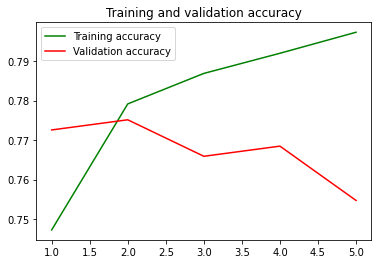

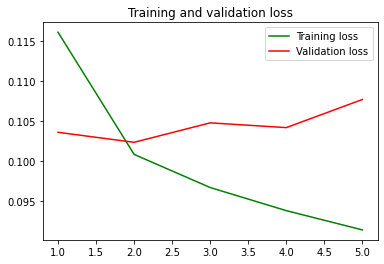

In [76]:
# Plot results
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()